# Please use the gitbuh for this as I have markdown images included https://github.com/nates-rgb/NeuralNet/tree/main/Projects



# Project Introduction 
This is the start of project 1: This project will take the input data of different muscle sensors to predict 4 different hand positions. This data is retrieved from kraggle, later on data will be grabbed from actual muscle sensros in lab, right now however the ablity to record motions and values has not been implemented. This data set has eight different muscles that have 8 different sensors attached to each one. This means that the data has 64 demensions, and one output demension. The gol for this project is git an intial base line for the emg muscle processing that I will being doing later on in the semester. The better that this model is means that the data that me and my group collect will be epected to achieve similar results.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.client import device_lib

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras import initializers
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

maxEpoch = 100 #making this a global variable because this way i can change all runs faster

# Getting the Data

The block of code holds all the pandas related stuff, the next section will handle converting the pandas dataframe to a numpy array and processing (normalizing the data)

Gesture classes were : rock - 0, scissors - 1, paper - 2, ok - 3. 

In [4]:

# this section of code was harder to solve than orgianally expected, as the contac did not let me use some of the function that i needed to use, 
# To solve this i had to make a new csv, and then drop a extra row that was added in the process, after that everything seemed to fall into place.
cols = [                                                    
'm1s1','m1s2','m1s3','m1s4','m1s5','m1s6','m1s7','m1s8',
'm2s1','m2s2','m2s3','m2s4','m2s5','m2s6','m2s7','m2s8',
'm3s1','m3s2','m3s3','m3s4','m3s5','m3s6','m3s7','m3s8',
'm4s1','m4s2','m4s3','m4s4','m4s5','m4s6','m4s7','m4s8',
'm5s1','m5s2','m5s3','m5s4','m5s5','m5s6','m5s7','m5s8',
'm6s1','m6s2','m6s3','m6s4','m6s5','m6s6','m6s7','m6s8',
'm7s1','m7s2','m7s3','m7s4','m7s5','m7s6','m7s7','m7s8',
'm8s1','m8s2','m8s3','m8s4','m8s5','m8s6','m8s7','m8s8','gesture']          #differnt column labels, m=muscle, s=sensor so m1s1 is muscle 1 sensor 1, and continues so on
df0 = pd.read_csv('archive1/0.csv')   #grab the data from csv0
df1 = pd.read_csv('archive1/1.csv')   #grab the data from csv1
df2 = pd.read_csv('archive1/2.csv')   #grab the data from csv2
df3 = pd.read_csv('archive1/3.csv')   #grab the data from csv3
df0.columns = cols #set up the columns
df1.columns = cols #set up the columns
df2.columns = cols #set up the columns
df3.columns = cols #set up the columns


frames = [df0, df1, df2, df3] #put all the frames in a list
temp = pd.concat(frames) #combine all the frames into one dataframe
temp.to_csv("input.csv") #write this new dataframe into a csv so that it can be processed better
dataframe = pd.read_csv("input.csv") #read the new csv back into the program



dataframe.drop( columns=dataframe.columns[0], axis=1,inplace=True) #the procesign of writing the other csvs into a big one, added the number column which was wrong so here we drop it
display(dataframe) #show a sample of the data

dataframe = dataframe.sample(frac=1)  #this is to scramble the data a little bit otherwise there would just be big chunks of the same class right next to each other.


display(dataframe)


,m1s1,m1s2,m1s3,m1s4,m1s5,m1s6,m1s7,m1s8,m2s1,m2s2,...,m7s8,m8s1,m8s2,m8s3,m8s4,m8s5,m8s6,m8s7,m8s8,gesture
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11669,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,...,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11670,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,...,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11671,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,...,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11672,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,...,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


,m1s1,m1s2,m1s3,m1s4,m1s5,m1s6,m1s7,m1s8,m2s1,m2s2,...,m7s8,m8s1,m8s2,m8s3,m8s4,m8s5,m8s6,m8s7,m8s8,gesture
2587,35.0,1.0,1.0,2.0,2.0,-2.0,-28.0,8.0,-7.0,-1.0,...,-8.0,9.0,0.0,0.0,-2.0,-6.0,2.0,57.0,14.0,0
4295,5.0,-2.0,-1.0,0.0,-8.0,-8.0,0.0,5.0,7.0,3.0,...,-5.0,-17.0,0.0,2.0,3.0,-28.0,-25.0,-3.0,1.0,1
9895,-38.0,-11.0,-4.0,-11.0,-8.0,-14.0,5.0,-23.0,-24.0,-3.0,...,-2.0,-18.0,3.0,-10.0,-27.0,4.0,-36.0,-30.0,0.0,3
6256,-18.0,-1.0,14.0,-3.0,-14.0,61.0,8.0,-20.0,20.0,12.0,...,-11.0,-18.0,-8.0,-7.0,-7.0,-13.0,-5.0,-11.0,4.0,2
3097,-13.0,-7.0,-3.0,-5.0,16.0,-2.0,-5.0,1.0,-10.0,2.0,...,-3.0,-1.0,7.0,-4.0,3.0,65.0,35.0,-1.0,-2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,3.0,-6.0,-1.0,-3.0,12.0,11.0,-2.0,9.0,11.0,-1.0,...,-17.0,-13.0,-16.0,-4.0,-6.0,-6.0,-11.0,-9.0,-4.0,2
8869,-3.0,-3.0,1.0,2.0,-9.0,14.0,-6.0,1.0,6.0,-2.0,...,-1.0,8.0,3.0,1.0,4.0,17.0,20.0,-1.0,0.0,3
201,-23.0,-9.0,-1.0,1.0,5.0,-10.0,-46.0,-20.0,26.0,2.0,...,-11.0,-18.0,1.0,3.0,-4.0,-4.0,-5.0,-58.0,-7.0,0
9802,12.0,-3.0,-4.0,-13.0,-52.0,-90.0,-18.0,3.0,-8.0,14.0,...,-4.0,43.0,14.0,-7.0,-27.0,3.0,11.0,15.0,-3.0,3


# Beginning of data processing



As mentioned in the comments, the second table is the same data but scrambled so that the would not be continous blocks of the same class. The reason that is needed is because if the data was not scrambled the model might have signifigantly more of one class than the other, this helps to combat that a little bit.

Next I am going to split the data into test train and val sets by using 2 iterations of train test split to get a distribution at the end of 40-20-20 for my train val and test sets.


In [32]:
from sklearn.model_selection import train_test_split
display(dataframe)

allX = dataframe.loc[:, dataframe.columns != "gesture"] #grab all data points execpt the classes
allY = dataframe["gesture"] #grab only the classes


trainX, testX, trainY, testY = train_test_split(allX, allY, test_size=.4, random_state=1)  #grab all of the data and put 40% of it into the test sets
valX, testX, valY, testY, = train_test_split(testX, testY, test_size=.5, random_state=1)   #then from the test data spilt that in half for the test and val sets.


y=trainY
vy=valY
trainY = to_categorical(trainY)   #congigure all of the y inputs into 1 hots form ie class 0 would be more like [0,0,0,1] one would be [0,0,1,0] and so on
testY = to_categorical(testY)
valY = to_categorical(valY)


print(trainX.shape, " ", valX.shape, " ", testX.shape)  #confirm shapes




labelNames = ['Rock', 'Paper', 'Scissors', 'Ok'] #what the classes are


#The data is first split in what will be training and validation, and testing.


,m1s1,m1s2,m1s3,m1s4,m1s5,m1s6,m1s7,m1s8,m2s1,m2s2,...,m7s8,m8s1,m8s2,m8s3,m8s4,m8s5,m8s6,m8s7,m8s8,gesture
2587,35.0,1.0,1.0,2.0,2.0,-2.0,-28.0,8.0,-7.0,-1.0,...,-8.0,9.0,0.0,0.0,-2.0,-6.0,2.0,57.0,14.0,0
4295,5.0,-2.0,-1.0,0.0,-8.0,-8.0,0.0,5.0,7.0,3.0,...,-5.0,-17.0,0.0,2.0,3.0,-28.0,-25.0,-3.0,1.0,1
9895,-38.0,-11.0,-4.0,-11.0,-8.0,-14.0,5.0,-23.0,-24.0,-3.0,...,-2.0,-18.0,3.0,-10.0,-27.0,4.0,-36.0,-30.0,0.0,3
6256,-18.0,-1.0,14.0,-3.0,-14.0,61.0,8.0,-20.0,20.0,12.0,...,-11.0,-18.0,-8.0,-7.0,-7.0,-13.0,-5.0,-11.0,4.0,2
3097,-13.0,-7.0,-3.0,-5.0,16.0,-2.0,-5.0,1.0,-10.0,2.0,...,-3.0,-1.0,7.0,-4.0,3.0,65.0,35.0,-1.0,-2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7798,3.0,-6.0,-1.0,-3.0,12.0,11.0,-2.0,9.0,11.0,-1.0,...,-17.0,-13.0,-16.0,-4.0,-6.0,-6.0,-11.0,-9.0,-4.0,2
8869,-3.0,-3.0,1.0,2.0,-9.0,14.0,-6.0,1.0,6.0,-2.0,...,-1.0,8.0,3.0,1.0,4.0,17.0,20.0,-1.0,0.0,3
201,-23.0,-9.0,-1.0,1.0,5.0,-10.0,-46.0,-20.0,26.0,2.0,...,-11.0,-18.0,1.0,3.0,-4.0,-4.0,-5.0,-58.0,-7.0,0
9802,12.0,-3.0,-4.0,-13.0,-52.0,-90.0,-18.0,3.0,-8.0,14.0,...,-4.0,43.0,14.0,-7.0,-27.0,3.0,11.0,15.0,-3.0,3


(7004, 64)   (2335, 64)   (2335, 64)


Next just to see how the data is without doing anything I am going to run relu on it just to see how much work needs to go into this data to make it useful.

2022-10-17 13:03:18.447184: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 13:03:18.477543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 13:03:18.477941: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-17 13:03:18.478698: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/100
 51/219 [=====>........................] - ETA: 0s - loss: 2.9253 - accuracy: 0.4222

2022-10-17 13:03:22.517508: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


219/219 [==============================] - 3s 5ms/step - loss: 1.4165 - accuracy: 0.6339 - val_loss: 0.7530 - val_accuracy: 0.7559
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.3768 - accuracy: 0.8624 - val_loss: 0.5876 - val_accuracy: 0.8158
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1992 - accuracy: 0.9302 - val_loss: 0.5420 - val_accuracy: 0.8347
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0998 - accuracy: 0.9704 - val_loss: 0.4860 - val_accuracy: 0.8608
Epoch 5/100
219/219 [==============================] - 1s 5ms/step - loss: 0.0643 - accuracy: 0.9814 - val_loss: 0.4743 - val_accuracy: 0.8647
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0359 - accuracy: 0.9934 - val_loss: 0.4873 - val_accuracy: 0.8690
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0192 - accuracy: 0.9984 - val_loss: 0.4796 - val_accuracy: 0.8779
Epoch 8/100

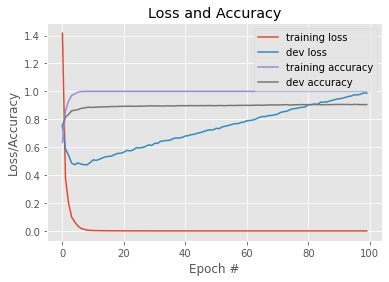

In [ ]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
# maxEpoch = 300
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()



The orginal data from this is already very usable for the network and does not need that much to be done to it. The main Issue this model will suffer from is the size of the network I choser for this test. As it is plan to see, becuase of the size the network is overfitting alot. First I am going to normalize the data, then the next step is to start making some choices to improve the model.


In [45]:
from sklearn import preprocessing
#bound the data between -1, and 1 in order to maintain most of the datas information.
print(trainX.shape)
trainX = preprocessing.normalize(trainX)
testX = preprocessing.normalize(testX)
valX = preprocessing.normalize(valX)

print(trainX.min(), trainX.max())

(7004, 64)
-0.8125616347431193 0.8603724002114839


# Data Processing over
The data is now Normalzied between -1 and 1 to preserver most of the datas, information.

# Bench Mark

In [38]:
model = LogisticRegression(random_state=1).fit(trainX, y)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)
realY = vy
# convert posterior probabilities to labels
#predictedY = predictedY.argmax(axis = 1)
#realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))



Test accuracy
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       583
           1       0.32      0.31      0.32       583
           2       0.28      0.27      0.27       577
           3       0.32      0.34      0.33       592

    accuracy                           0.35      2335
   macro avg       0.35      0.35      0.35      2335
weighted avg       0.35      0.35      0.35      2335



Alright then the benchmark shows that there is alot of work to do with this model, but it is also shows that it is possible to be better with more layers. as of right now it is guessing right 35 percent of the time a completly random quess would only be right .25 percent of the time and thats only if it happened once. Already the model has learn to a better degrtee than pure random guesses. Adding more layers to this and making it a network should allow for a massive gain in accuracy. Although because this models base is really bad, I think a dense model for this application would be best. So to start out I am going to multiply the number of inputs(64) by 4 to get a total of 256. this will be the amount of nodes in the first layer, from there being that is a tad excessive, the next layer will drop by half to 128. These numbers were chosen to make the model larger so that instead of a low accuracy.

# Time to start deciding on a activation function

### relu
Next on the docket is to decide on which activation function we are going to focus on for this network. First lets run relu again

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 1.0323 - accuracy: 0.5938 - val_loss: 0.6290 - val_accuracy: 0.7880
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.3926 - accuracy: 0.8708 - val_loss: 0.2930 - val_accuracy: 0.8985
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1998 - accuracy: 0.9343 - val_loss: 0.2203 - val_accuracy: 0.9191
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1252 - accuracy: 0.9630 - val_loss: 0.1951 - val_accuracy: 0.9272
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0913 - accuracy: 0.9727 - val_loss: 0.1864 - val_accuracy: 0.9345
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0647 - accuracy: 0.9826 - val_loss: 0.1949 - val_accuracy: 0.9281
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0449 - accuracy: 0.9897 - val_loss: 0.1895 - val_accuracy: 0.9332

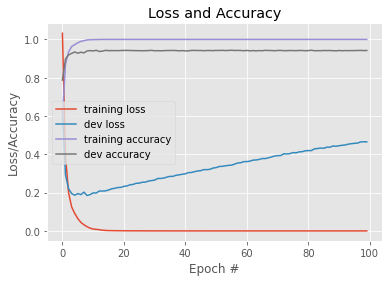

In [ ]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 300
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright that really brought our accuracy way up, which is what we want. however there is now over fitting, next up I am going to pick relu again but this time I am going to use 6 layers of 64 nodes for a deeper network instead of a larger one.

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 1.1330 - accuracy: 0.4632 - val_loss: 0.8721 - val_accuracy: 0.6128
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 0.7461 - accuracy: 0.6862 - val_loss: 0.6903 - val_accuracy: 0.7139
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7741 - val_loss: 0.5922 - val_accuracy: 0.7576
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8357 - val_loss: 0.5228 - val_accuracy: 0.7996
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.3198 - accuracy: 0.8794 - val_loss: 0.5218 - val_accuracy: 0.8056
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.9076 - val_loss: 0.5459 - val_accuracy: 0.8236
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.1974 - accuracy: 0.9270 - val_loss: 0.4947 - val_accuracy: 0.8441

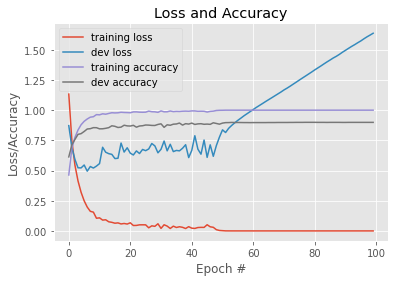

In [41]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(64, input_shape = (64,), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 300
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Interestingly although larger networks are supposed to work better than wider networks, it seems in this case that data actually preforms a lot better with a wider but more or less shallow network. This is the idea we will run with for the rest of the project, our number of layers will not exceed 4 hidden layers

Alright well relu seems to work really well with this data, so lets check the other activation functions. 

### Tanh

Next lets take a look at tanh 

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 1.3926 - accuracy: 0.3051 - val_loss: 1.3813 - val_accuracy: 0.3019
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 1.3765 - accuracy: 0.3255 - val_loss: 1.3741 - val_accuracy: 0.3238
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 1.3693 - accuracy: 0.3435 - val_loss: 1.3688 - val_accuracy: 0.3306
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 1.3658 - accuracy: 0.3372 - val_loss: 1.3650 - val_accuracy: 0.3366
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 1.3634 - accuracy: 0.3485 - val_loss: 1.3654 - val_accuracy: 0.3340
Epoch 6/100
219/219 [==============================] - 0s 1ms/step - loss: 1.3595 - accuracy: 0.3491 - val_loss: 1.3641 - val_accuracy: 0.3503
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 1.3596 - accuracy: 0.3457 - val_loss: 1.3641 - val_accuracy: 0.3396

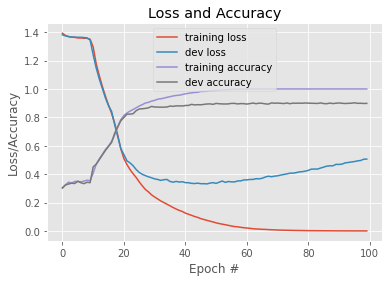

In [47]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'tanh'))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 300
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Thoughts on tanh. 
While it does boast similar results to relu, it gets there slower overall so if I am going to use a high accuracy moodel, Relu seems to be the best option.


### Sigmoid
The next activation function that I am going to test is the Sigmoid function. The sigmoid activation function is really good for use in classification models as it is bounded between 0 and 1, Also being this model is the best to use for normalizing data, the over fitting might be reduced with this function

Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 1.4051 - accuracy: 0.2494 - val_loss: 1.4015 - val_accuracy: 0.2493
Epoch 2/100
219/219 [==============================] - 1s 5ms/step - loss: 1.3993 - accuracy: 0.2549 - val_loss: 1.4233 - val_accuracy: 0.2510
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3962 - accuracy: 0.2633 - val_loss: 1.3958 - val_accuracy: 0.2463
Epoch 4/100
219/219 [==============================] - 1s 5ms/step - loss: 1.3924 - accuracy: 0.2700 - val_loss: 1.4085 - val_accuracy: 0.2488
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3863 - accuracy: 0.2723 - val_loss: 1.3877 - val_accuracy: 0.2672
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3857 - accuracy: 0.2716 - val_loss: 1.3968 - val_accuracy: 0.2702
Epoch 7/100
219/219 [==============================] - 1s 5ms/step - loss: 1.3842 - accuracy: 0.2870 - val_loss: 1.3851 - val_accuracy: 0.3006

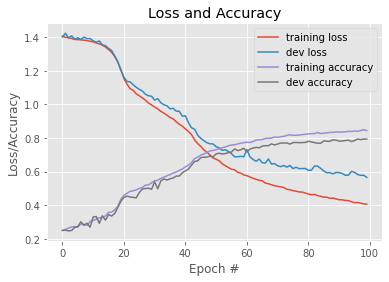

In [ ]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Over all the accuracy of this model is not good at all, however, that can be worked with at a later date. The biggest plus that sigmoid has going for it is the low amound of over fitting going on in the model.

# Tuning the Network to be the best that it can be 94-96 percent accuracy is the goal



Looking at this, while tanh had better accuracy, the problem in over fitting is  worse than relu's. The project a such will focus on sigmoid, and try to reduce the overfitting and boost the accuracy even more

A cause of overfitting can be caused by network size, I will reduce the size of the network to 128 and 64 and see if this will give me a similar accuracy with lowered overfitting.

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 1.3948 - accuracy: 0.2651 - val_loss: 1.3878 - val_accuracy: 0.2475
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3899 - accuracy: 0.2536 - val_loss: 1.3941 - val_accuracy: 0.2510
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3919 - accuracy: 0.2519 - val_loss: 1.3902 - val_accuracy: 0.2467
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3881 - accuracy: 0.2590 - val_loss: 1.3875 - val_accuracy: 0.2582
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3872 - accuracy: 0.2800 - val_loss: 1.3852 - val_accuracy: 0.2600
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3853 - accuracy: 0.2783 - val_loss: 1.3870 - val_accuracy: 0.2664
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3827 - accuracy: 0.2841 - val_loss: 1.3950 - val_accuracy: 0.2737

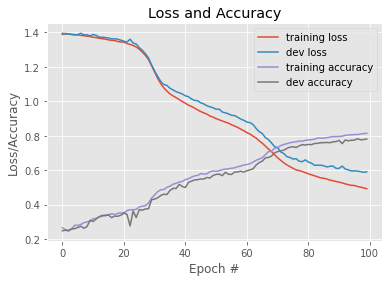

In [ ]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(128, input_shape = (64,), activation = 'sigmoid'))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
#maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright lets compare both of the sigmoid models that we have created(note this may be differnt from results because these images were grabbed from early run)(images must be in same path or folder as the project)



Large network:  Small network:


![largesig](sigL.png "large Network:") ![smallsig](sigS.png "Small Network:")






Comparing these two graphs,(the left graph is the larger sigmoid network, and the right side is the smaller network) the smaller model has slighlty less overfitting, It also is less accurate. Because of this, a larger network with dorpout would should give us a higher accuracy than the thinner networks ever really could. The next test is going to add another layer of 128 neurons to the work while also adding a small amount of dropout to see if we can give the accuracy of our model a boost, while keeping the overfitting down.

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 1.4015 - accuracy: 0.2404 - val_loss: 1.3937 - val_accuracy: 0.2497
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 1.3962 - accuracy: 0.2530 - val_loss: 1.3879 - val_accuracy: 0.2471
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 1.3946 - accuracy: 0.2410 - val_loss: 1.3879 - val_accuracy: 0.2471
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 1.3910 - accuracy: 0.2589 - val_loss: 1.3950 - val_accuracy: 0.2497
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 1.3914 - accuracy: 0.2527 - val_loss: 1.3948 - val_accuracy: 0.2497
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 1.3936 - accuracy: 0.2481 - val_loss: 1.3877 - val_accuracy: 0.2471
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 1.3937 - accuracy: 0.2480 - val_loss: 1.3925 - val_accuracy: 0.2497

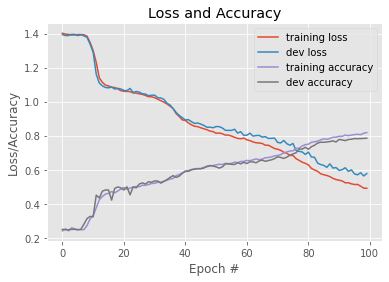

In [53]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright so we got a little to no increase in accuracy, but the over fitting is basically back where everything started from.


alright so we have a decreasing loss, so now I want to see if a larger number of epochs will give a different view as to what is happening with this code

Epoch 1/300
219/219 [==============================] - 1s 3ms/step - loss: 1.3967 - accuracy: 0.2454 - val_loss: 1.3874 - val_accuracy: 0.2535
Epoch 2/300
219/219 [==============================] - 0s 2ms/step - loss: 1.3939 - accuracy: 0.2470 - val_loss: 1.3932 - val_accuracy: 0.2535
Epoch 3/300
219/219 [==============================] - 0s 2ms/step - loss: 1.3904 - accuracy: 0.2553 - val_loss: 1.3875 - val_accuracy: 0.2411
Epoch 4/300
219/219 [==============================] - 0s 2ms/step - loss: 1.3923 - accuracy: 0.2527 - val_loss: 1.3939 - val_accuracy: 0.2535
Epoch 5/300
219/219 [==============================] - 0s 2ms/step - loss: 1.3916 - accuracy: 0.2489 - val_loss: 1.3943 - val_accuracy: 0.2535
Epoch 6/300
219/219 [==============================] - 0s 2ms/step - loss: 1.3906 - accuracy: 0.2497 - val_loss: 1.3871 - val_accuracy: 0.2471
Epoch 7/300
219/219 [==============================] - 0s 2ms/step - loss: 1.3879 - accuracy: 0.2614 - val_loss: 1.3881 - val_accuracy: 0.2497

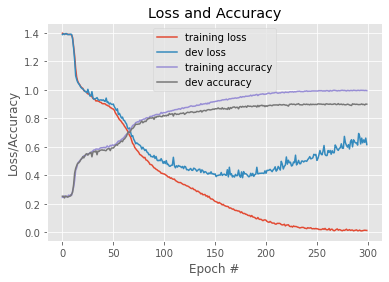

In [48]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =300
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

More epochs do increase the accuracy of the model. However the accuracy's plateaus at around 135 epochs. This is the best number of epochs to run at right now so 180 will be the new number of epochs we will run while training.

Epoch 1/180
219/219 [==============================] - 2s 6ms/step - loss: 1.4012 - accuracy: 0.2469 - val_loss: 1.4004 - val_accuracy: 0.2527
Epoch 2/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3949 - accuracy: 0.2477 - val_loss: 1.3871 - val_accuracy: 0.2488
Epoch 3/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3916 - accuracy: 0.2476 - val_loss: 1.3864 - val_accuracy: 0.2510
Epoch 4/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3907 - accuracy: 0.2513 - val_loss: 1.3870 - val_accuracy: 0.2488
Epoch 5/180
219/219 [==============================] - 1s 5ms/step - loss: 1.3908 - accuracy: 0.2461 - val_loss: 1.3901 - val_accuracy: 0.2634
Epoch 6/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3905 - accuracy: 0.2547 - val_loss: 1.3864 - val_accuracy: 0.2527
Epoch 7/180
219/219 [==============================] - 1s 4ms/step - loss: 1.3883 - accuracy: 0.2594 - val_loss: 1.3874 - val_accuracy: 0.2510

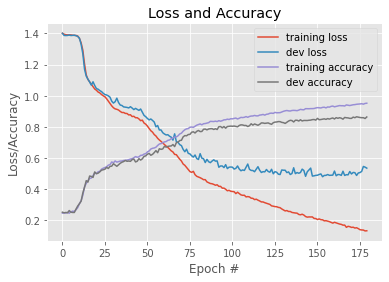

In [ ]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

That got us up to about 87 accuracy, which is really good. however we are now once again over fitting our data. However our overfitting is not too extreme, so I wager that our data is not the problem. The next approach is to try sum of square errors and test to see if a different loss function will change the outcome of the data



Epoch 1/180
219/219 [==============================] - 1s 2ms/step - loss: 0.1901 - accuracy: 0.2567 - val_loss: 0.1876 - val_accuracy: 0.2535
Epoch 2/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.2531 - val_loss: 0.1889 - val_accuracy: 0.2471
Epoch 3/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.2483 - val_loss: 0.1878 - val_accuracy: 0.2488
Epoch 4/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.2529 - val_loss: 0.1883 - val_accuracy: 0.2497
Epoch 5/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.2476 - val_loss: 0.1877 - val_accuracy: 0.2497
Epoch 6/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.2473 - val_loss: 0.1875 - val_accuracy: 0.2475
Epoch 7/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.2534 - val_loss: 0.1889 - val_accuracy: 0.2475

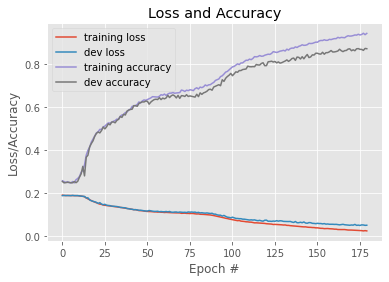

In [21]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright The loss function on this run is a lot better than the cross entropy error loss. So as we continure to work with sigmoids we will use sum of square errors instead. The problem of over fitting still persites but that will be solved at a later data

## Regularzation

The next step in this proecess is to try a couple of differnt values to see if add either l1 or l2 penalties or both will help our model.

Epoch 1/180
219/219 [==============================] - 1s 2ms/step - loss: 8.6294 - accuracy: 0.2531 - val_loss: 0.2600 - val_accuracy: 0.2471
Epoch 2/180
219/219 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.2513 - val_loss: 0.2591 - val_accuracy: 0.2535
Epoch 3/180
219/219 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.2431 - val_loss: 0.2588 - val_accuracy: 0.2497
Epoch 4/180
219/219 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.2444 - val_loss: 0.2596 - val_accuracy: 0.2471
Epoch 5/180
219/219 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.2511 - val_loss: 0.2594 - val_accuracy: 0.2471
Epoch 6/180
219/219 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.2547 - val_loss: 0.2592 - val_accuracy: 0.2471
Epoch 7/180
219/219 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.2496 - val_loss: 0.2593 - val_accuracy: 0.2471

/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


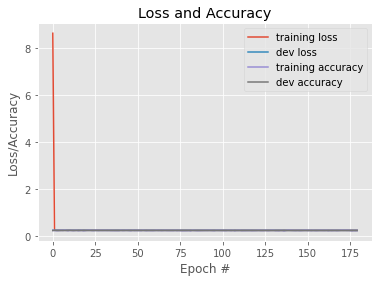

In [54]:


# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
reg = l1_l2(l1 = 0.01, l2 = 0.0)
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Epoch 1/180
219/219 [==============================] - 1s 2ms/step - loss: 420.1752 - accuracy: 0.2499 - val_loss: 3.8735 - val_accuracy: 0.2497
Epoch 2/180
219/219 [==============================] - 0s 2ms/step - loss: 3.8086 - accuracy: 0.2463 - val_loss: 3.8227 - val_accuracy: 0.2497
Epoch 3/180
219/219 [==============================] - 0s 2ms/step - loss: 3.8027 - accuracy: 0.2511 - val_loss: 3.7815 - val_accuracy: 0.2497
Epoch 4/180
219/219 [==============================] - 0s 2ms/step - loss: 3.8004 - accuracy: 0.2499 - val_loss: 3.7870 - val_accuracy: 0.2535
Epoch 5/180
219/219 [==============================] - 0s 2ms/step - loss: 3.7994 - accuracy: 0.2374 - val_loss: 3.8128 - val_accuracy: 0.2535
Epoch 6/180
219/219 [==============================] - 0s 2ms/step - loss: 3.7981 - accuracy: 0.2563 - val_loss: 3.8091 - val_accuracy: 0.2497
Epoch 7/180
219/219 [==============================] - 0s 2ms/step - loss: 3.7970 - accuracy: 0.2479 - val_loss: 3.8058 - val_accuracy: 0.24

/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


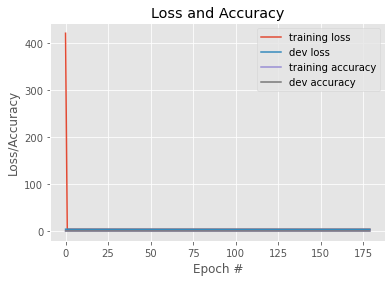

In [56]:


# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
reg = l1_l2(l1 = 0.5, l2 = 0.0)
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Epoch 1/180
219/219 [==============================] - 1s 2ms/step - loss: 763.7698 - accuracy: 0.2450 - val_loss: 6.8490 - val_accuracy: 0.2471
Epoch 2/180
219/219 [==============================] - 0s 2ms/step - loss: 6.7267 - accuracy: 0.2443 - val_loss: 6.7825 - val_accuracy: 0.2471
Epoch 3/180
219/219 [==============================] - 0s 2ms/step - loss: 6.7191 - accuracy: 0.2500 - val_loss: 6.6467 - val_accuracy: 0.2497
Epoch 4/180
219/219 [==============================] - 0s 2ms/step - loss: 6.7158 - accuracy: 0.2380 - val_loss: 6.6985 - val_accuracy: 0.2497
Epoch 5/180
219/219 [==============================] - 0s 2ms/step - loss: 6.7131 - accuracy: 0.2467 - val_loss: 6.7474 - val_accuracy: 0.2535
Epoch 6/180
219/219 [==============================] - 0s 2ms/step - loss: 6.7104 - accuracy: 0.2506 - val_loss: 6.7566 - val_accuracy: 0.2471
Epoch 7/180
219/219 [==============================] - 0s 2ms/step - loss: 6.7085 - accuracy: 0.2456 - val_loss: 6.6959 - val_accuracy: 0.24

/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


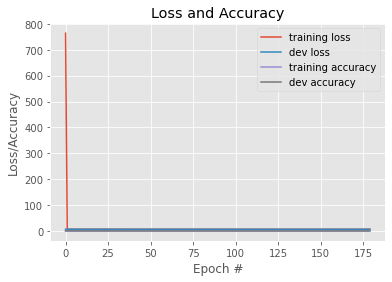

In [57]:


# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
reg = l1_l2(l1 = 0.9, l2 = 0.000000000000000000000000000000000000001)
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

As Expected L1 regularzation is not a good thing for this model. This is becuase every muscle's value is important to determine what motion is happening. Interestingly neither is L2 after running numerous tests the both give a accuracy of 24%

Epoch 1/180
219/219 [==============================] - 1s 2ms/step - loss: 0.1892 - accuracy: 0.2469 - val_loss: 0.1878 - val_accuracy: 0.2535
Epoch 2/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.2456 - val_loss: 0.1885 - val_accuracy: 0.2535
Epoch 3/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.2406 - val_loss: 0.1877 - val_accuracy: 0.2471
Epoch 4/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.2514 - val_loss: 0.1885 - val_accuracy: 0.2471
Epoch 5/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.2479 - val_loss: 0.1878 - val_accuracy: 0.2497
Epoch 6/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1879 - accuracy: 0.2557 - val_loss: 0.1877 - val_accuracy: 0.2582
Epoch 7/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1877 - accuracy: 0.2591 - val_loss: 0.1877 - val_accuracy: 0.2651

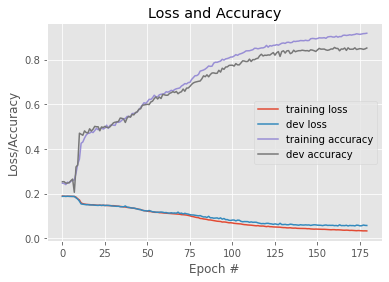

In [23]:


# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
reg = l1_l2(l1 = 0.00, l2 = 0.000000000001)
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Epoch 1/180
219/219 [==============================] - 1s 3ms/step - loss: 0.1900 - accuracy: 0.2451 - val_loss: 0.1891 - val_accuracy: 0.2471
Epoch 2/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1889 - accuracy: 0.2543 - val_loss: 0.1879 - val_accuracy: 0.2535
Epoch 3/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.2531 - val_loss: 0.1882 - val_accuracy: 0.2535
Epoch 4/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1885 - accuracy: 0.2494 - val_loss: 0.1880 - val_accuracy: 0.2471
Epoch 5/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.2560 - val_loss: 0.1888 - val_accuracy: 0.2497
Epoch 6/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.2537 - val_loss: 0.1881 - val_accuracy: 0.2471
Epoch 7/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.2551 - val_loss: 0.1878 - val_accuracy: 0.2471

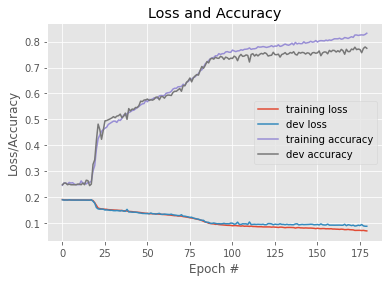

In [58]:


# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
reg = l1_l2(l1 = 0.00, l2 = 0.000001)
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Epoch 1/180
219/219 [==============================] - 1s 2ms/step - loss: 6.8576 - accuracy: 0.2474 - val_loss: 0.2676 - val_accuracy: 0.2497
Epoch 2/180
219/219 [==============================] - 0s 2ms/step - loss: 0.2000 - accuracy: 0.2440 - val_loss: 0.1879 - val_accuracy: 0.2535
Epoch 3/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.2530 - val_loss: 0.1883 - val_accuracy: 0.2497
Epoch 4/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.2460 - val_loss: 0.1879 - val_accuracy: 0.2471
Epoch 5/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.2434 - val_loss: 0.1890 - val_accuracy: 0.2471
Epoch 6/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.2436 - val_loss: 0.1878 - val_accuracy: 0.2497
Epoch 7/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.2477 - val_loss: 0.1892 - val_accuracy: 0.2497

/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


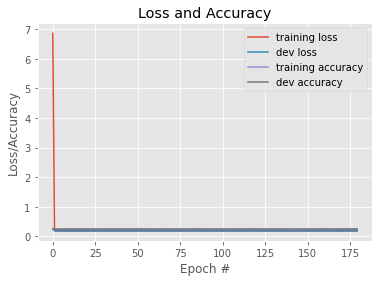

In [59]:


# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
reg = l1_l2(l1 = 0.00, l2 = 0.1)
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Epoch 1/180
219/219 [==============================] - 1s 2ms/step - loss: 33.6810 - accuracy: 0.2397 - val_loss: 0.5808 - val_accuracy: 0.2535
Epoch 2/180
219/219 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 0.2467 - val_loss: 0.1878 - val_accuracy: 0.2497
Epoch 3/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.2414 - val_loss: 0.1877 - val_accuracy: 0.2497
Epoch 4/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.2474 - val_loss: 0.1879 - val_accuracy: 0.2471
Epoch 5/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.2510 - val_loss: 0.1877 - val_accuracy: 0.2535
Epoch 6/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.2581 - val_loss: 0.1878 - val_accuracy: 0.2497
Epoch 7/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.2610 - val_loss: 0.1878 - val_accuracy: 0.249

/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


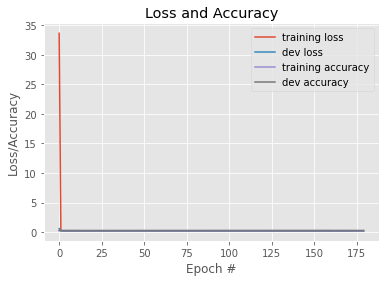

In [60]:


# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
reg = l1_l2(l1 = 0.00, l2 = 0.5)
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Epoch 1/180
219/219 [==============================] - 1s 2ms/step - loss: 60.2888 - accuracy: 0.2519 - val_loss: 0.8964 - val_accuracy: 0.2535
Epoch 2/180
219/219 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.2447 - val_loss: 0.1880 - val_accuracy: 0.2535
Epoch 3/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.2489 - val_loss: 0.1878 - val_accuracy: 0.2497
Epoch 4/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.2451 - val_loss: 0.1877 - val_accuracy: 0.2497
Epoch 5/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1883 - accuracy: 0.2429 - val_loss: 0.1879 - val_accuracy: 0.2535
Epoch 6/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1882 - accuracy: 0.2429 - val_loss: 0.1879 - val_accuracy: 0.2497
Epoch 7/180
219/219 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.2537 - val_loss: 0.1878 - val_accuracy: 0.247

/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nate/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


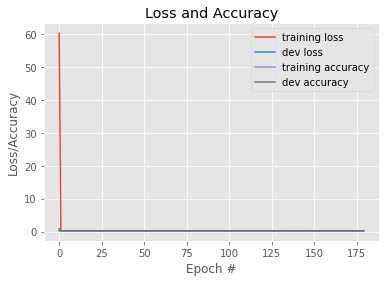

In [61]:


# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
reg = l1_l2(l1 = 0.00, l2 = 0.9)
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(64, activation = 'sigmoid',kernel_regularizer = reg))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =180

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright so these test show that l1 and l2 are both not good things for our model. More tests were run than shown but it all very conclusive evidence

I will conced the point that l2 does bring down the overfitting, however it simultanously tanks the accuracy as well so over all it is a bad thing

## Mix and Match Flavors

Alright so far we have only really touched pure sigmoid functions. We know that relu give us a high accuracy, but also a high amount of over fitting. Sigmoid does not have the issue with overfitting. Next I will try to take advantage of this by mixing relu and sigmoid and seeing how everything turns out. We will start with 2 sigmoid layers and then a relu layer. I am running a massive amount of epochs so that all behavior will be seen from theses test, we will select a more apporiate epoch count later

Epoch 1/500
219/219 [==============================] - 1s 2ms/step - loss: 0.1899 - accuracy: 0.2541 - val_loss: 0.1885 - val_accuracy: 0.2308
Epoch 2/500
219/219 [==============================] - 0s 2ms/step - loss: 0.1884 - accuracy: 0.2487 - val_loss: 0.1876 - val_accuracy: 0.2471
Epoch 3/500
219/219 [==============================] - 0s 2ms/step - loss: 0.1880 - accuracy: 0.2464 - val_loss: 0.1876 - val_accuracy: 0.2471
Epoch 4/500
219/219 [==============================] - 0s 2ms/step - loss: 0.1878 - accuracy: 0.2429 - val_loss: 0.1875 - val_accuracy: 0.2497
Epoch 5/500
219/219 [==============================] - 0s 2ms/step - loss: 0.1876 - accuracy: 0.2477 - val_loss: 0.1875 - val_accuracy: 0.2510
Epoch 6/500
219/219 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.2607 - val_loss: 0.1877 - val_accuracy: 0.2471
Epoch 7/500
219/219 [==============================] - 0s 2ms/step - loss: 0.1875 - accuracy: 0.2524 - val_loss: 0.1875 - val_accuracy: 0.2475

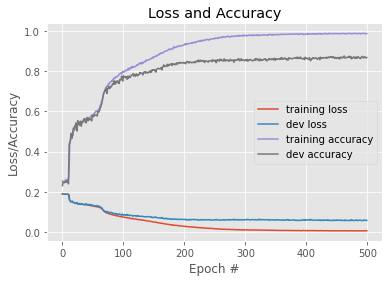

In [24]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =500

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

!["acc"](ssr.png)








Alright so as we can see here, just one layer of relu at the end did not give any signifigant boost to accuracy, but instead wildly increased the overfitting of the model. Seeing as how that is the case, sigmoid seems to overfit less so next I will try the opppisite case of 2 layser of relu to 1 sigmoid.

Epoch 1/500
219/219 [==============================] - 1s 2ms/step - loss: 0.1462 - accuracy: 0.5100 - val_loss: 0.0950 - val_accuracy: 0.7409
Epoch 2/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.8168 - val_loss: 0.0472 - val_accuracy: 0.8784
Epoch 3/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9130 - val_loss: 0.0322 - val_accuracy: 0.9173
Epoch 4/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9487 - val_loss: 0.0279 - val_accuracy: 0.9268
Epoch 5/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9654 - val_loss: 0.0253 - val_accuracy: 0.9310
Epoch 6/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9774 - val_loss: 0.0235 - val_accuracy: 0.9392
Epoch 7/500
219/219 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9817 - val_loss: 0.0237 - val_accuracy: 0.9379

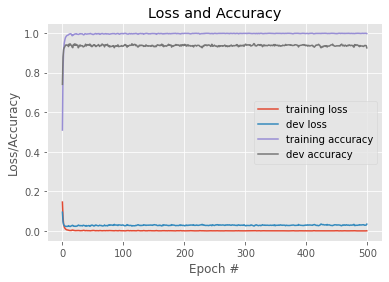

In [25]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.01
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =500

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

These results are much better, and the overfitting is alot less than it was. Now next up we are going to drop to 6 epochs as that is where the values are high and stable. We will also increase the dropout coeffecient to reduce the over fitting even more.

Epoch 1/6
219/219 [==============================] - 1s 2ms/step - loss: 0.1570 - accuracy: 0.4637 - val_loss: 0.0928 - val_accuracy: 0.7563
Epoch 2/6
219/219 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.8398 - val_loss: 0.0373 - val_accuracy: 0.9084
Epoch 3/6
219/219 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9232 - val_loss: 0.0276 - val_accuracy: 0.9306
Epoch 4/6
219/219 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9500 - val_loss: 0.0237 - val_accuracy: 0.9358
Epoch 5/6
219/219 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9656 - val_loss: 0.0229 - val_accuracy: 0.9400
Epoch 6/6
219/219 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9674 - val_loss: 0.0221 - val_accuracy: 0.9435
Test accuracy
73/73 [==============================] - 0s 758us/step
              precision    recall  f1-score   support

           0       0.99      0

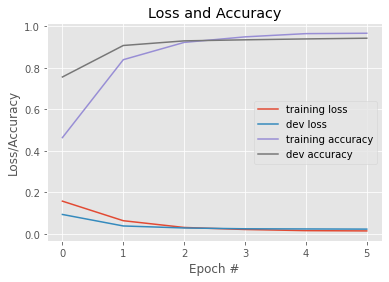

In [26]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.1
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =6

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Alright that really droped down the over fitting to next to nothing while maintaining 94 percent accuracy, but we should be able to increase the dropout by another 0.1 to see a greater effect on the reduction of the amount of overfitting that the model is producing

Epoch 1/6
219/219 [==============================] - 1s 2ms/step - loss: 0.1667 - accuracy: 0.3996 - val_loss: 0.1095 - val_accuracy: 0.7161
Epoch 2/6
219/219 [==============================] - 0s 2ms/step - loss: 0.0841 - accuracy: 0.7630 - val_loss: 0.0499 - val_accuracy: 0.8672
Epoch 3/6
219/219 [==============================] - 0s 2ms/step - loss: 0.0422 - accuracy: 0.8909 - val_loss: 0.0296 - val_accuracy: 0.9268
Epoch 4/6
219/219 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9253 - val_loss: 0.0240 - val_accuracy: 0.9370
Epoch 5/6
219/219 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9370 - val_loss: 0.0218 - val_accuracy: 0.9439
Epoch 6/6
219/219 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9505 - val_loss: 0.0217 - val_accuracy: 0.9422
Test accuracy
73/73 [==============================] - 0s 680us/step
              precision    recall  f1-score   support

           0       1.00      0

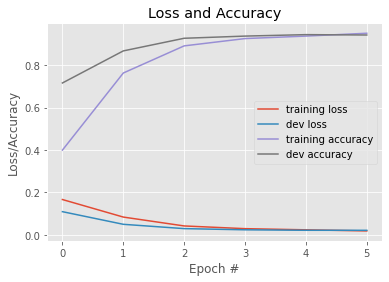

In [27]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =6

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

As we can see here we have basically elimanted the overfitting of the model. Lets see what happens if we add another layer of relu.

Epoch 1/6
219/219 [==============================] - 2s 6ms/step - loss: 1.1118 - accuracy: 0.4358 - val_loss: 0.6696 - val_accuracy: 0.7173
Epoch 2/6
219/219 [==============================] - 1s 5ms/step - loss: 0.6108 - accuracy: 0.7249 - val_loss: 0.4756 - val_accuracy: 0.7846
Epoch 3/6
219/219 [==============================] - 1s 5ms/step - loss: 0.4045 - accuracy: 0.8320 - val_loss: 0.3261 - val_accuracy: 0.8711
Epoch 4/6
219/219 [==============================] - 1s 5ms/step - loss: 0.2566 - accuracy: 0.9009 - val_loss: 0.2439 - val_accuracy: 0.9101
Epoch 5/6
219/219 [==============================] - 1s 5ms/step - loss: 0.1812 - accuracy: 0.9338 - val_loss: 0.2085 - val_accuracy: 0.9225
Epoch 6/6
219/219 [==============================] - 1s 5ms/step - loss: 0.1457 - accuracy: 0.9522 - val_loss: 0.2116 - val_accuracy: 0.9310
Test accuracy
73/73 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.9

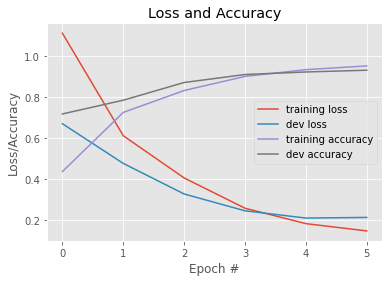

In [ ]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =6

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

It seems that at this point adding more layers only servers to increase overfitting So now lets try to decrease the batch size and see if that has a notable effect

Epoch 1/6
438/438 [==============================] - 1s 2ms/step - loss: 1.0489 - accuracy: 0.4994 - val_loss: 0.6040 - val_accuracy: 0.7850
Epoch 2/6
438/438 [==============================] - 1s 2ms/step - loss: 0.4771 - accuracy: 0.8107 - val_loss: 0.2989 - val_accuracy: 0.8976
Epoch 3/6
438/438 [==============================] - 1s 2ms/step - loss: 0.2749 - accuracy: 0.8991 - val_loss: 0.2089 - val_accuracy: 0.9255
Epoch 4/6
438/438 [==============================] - 1s 2ms/step - loss: 0.1888 - accuracy: 0.9346 - val_loss: 0.1938 - val_accuracy: 0.9323
Epoch 5/6
438/438 [==============================] - 1s 2ms/step - loss: 0.1520 - accuracy: 0.9473 - val_loss: 0.1726 - val_accuracy: 0.9405
Epoch 6/6
438/438 [==============================] - 1s 2ms/step - loss: 0.1235 - accuracy: 0.9572 - val_loss: 0.1644 - val_accuracy: 0.9426
Test accuracy
73/73 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.9

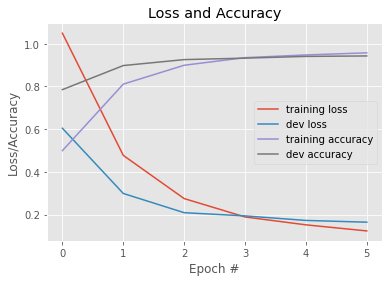

In [63]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))

model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =6

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 16, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Epoch 1/6
876/876 [==============================] - 2s 2ms/step - loss: 0.9197 - accuracy: 0.5672 - val_loss: 0.4552 - val_accuracy: 0.8381
Epoch 2/6
876/876 [==============================] - 1s 1ms/step - loss: 0.3461 - accuracy: 0.8711 - val_loss: 0.2291 - val_accuracy: 0.9195
Epoch 3/6
876/876 [==============================] - 1s 1ms/step - loss: 0.1982 - accuracy: 0.9293 - val_loss: 0.1639 - val_accuracy: 0.9405
Epoch 4/6
876/876 [==============================] - 1s 1ms/step - loss: 0.1556 - accuracy: 0.9453 - val_loss: 0.1630 - val_accuracy: 0.9452
Epoch 5/6
876/876 [==============================] - 1s 1ms/step - loss: 0.1217 - accuracy: 0.9565 - val_loss: 0.1755 - val_accuracy: 0.9422
Epoch 6/6
876/876 [==============================] - 1s 1ms/step - loss: 0.0967 - accuracy: 0.9672 - val_loss: 0.1857 - val_accuracy: 0.9435
Test accuracy
73/73 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.9

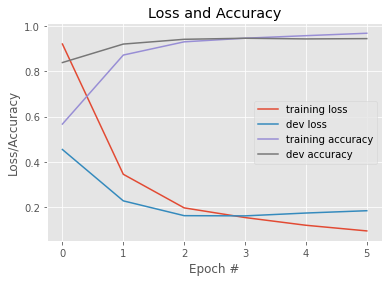

In [62]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))

model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =6

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 8, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Epoch 1/20
110/110 [==============================] - 1s 4ms/step - loss: 1.3574 - accuracy: 0.3324 - val_loss: 1.0137 - val_accuracy: 0.5700
Epoch 2/20
110/110 [==============================] - 0s 2ms/step - loss: 0.8338 - accuracy: 0.6196 - val_loss: 0.6201 - val_accuracy: 0.7829
Epoch 3/20
110/110 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7748 - val_loss: 0.4243 - val_accuracy: 0.8437
Epoch 4/20
110/110 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8485 - val_loss: 0.2950 - val_accuracy: 0.8942
Epoch 5/20
110/110 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8948 - val_loss: 0.2348 - val_accuracy: 0.9178
Epoch 6/20
110/110 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9230 - val_loss: 0.1962 - val_accuracy: 0.9319
Epoch 7/20
110/110 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9360 - val_loss: 0.1732 - val_accuracy: 0.9409
Epoch 

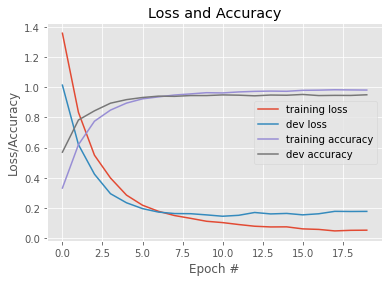

In [65]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))

model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =20

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 64, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

After testing with a batch size of both 16 and 8, the size of the batch for this data does not increase the accuracy at all. Although I did get one run that gave me 95 acc, it seems that was more a result of the random weights being initialized at optimal values. So it was not and effect of the change in batch size. infact messing with batch size up or down only increases the overfitting of the model. Using 64 for the batch gave an increase of 1 percent accuracy, but also added more overfitting so its not worth using.

# One final new contender for relu's spot
The biggest problem with relu is how it handles negitive values, so fo the next run I am going to try out a 2 hidden layer network of pure elu and see how that compares to the relu version on this data.

Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 1.3828 - accuracy: 0.3327 - val_loss: 1.3809 - val_accuracy: 0.3366
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 1.3514 - accuracy: 0.3607 - val_loss: 1.3239 - val_accuracy: 0.3760
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 1.1846 - accuracy: 0.4545 - val_loss: 1.0581 - val_accuracy: 0.5109
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.9360 - accuracy: 0.5798 - val_loss: 0.8766 - val_accuracy: 0.5991
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 0.7666 - accuracy: 0.6630 - val_loss: 0.7348 - val_accuracy: 0.6690
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.6157 - accuracy: 0.7539 - val_loss: 0.5980 - val_accuracy: 0.7512
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.4691 - accuracy: 0.8271 - val_loss: 0.4958 - val_accuracy: 0.7957

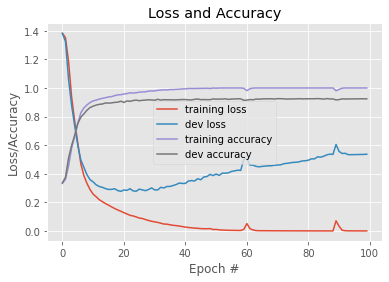

In [ ]:
# define the 3072-256-128-10 architecture using Keras
from tabnanny import verbose


model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'elu'))
model.add(Dense(128, activation = 'elu'))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

There are a couple of things worth looking at with this one. First lets pull up the images of the small sigmoid network(two layers), and the 2 layer relu functions loss and accuracy graphs.

!["ssig"](sigS.png)
!["relu"](relu.png)








Alright so looking at this, the overitting of elu is much worse than sigmoid, but it seems to build faster. However the reason for using sigmoid at the last layer was to try and tie the train data a bit more. so introducing a layer with a slightly worse overfitting amount is not a reasonable thing to do. Plus, the accuracy and speed of relu is better than elu's. Over all I do not believe it would make too much of a difference, but for the sake of proof I will test that.

Epoch 1/50
219/219 [==============================] - 2s 7ms/step - loss: 1.4447 - accuracy: 0.2583 - val_loss: 1.3790 - val_accuracy: 0.2934
Epoch 2/50
219/219 [==============================] - 1s 4ms/step - loss: 1.4039 - accuracy: 0.2968 - val_loss: 1.3639 - val_accuracy: 0.3285
Epoch 3/50
219/219 [==============================] - 1s 4ms/step - loss: 1.3618 - accuracy: 0.3291 - val_loss: 1.2984 - val_accuracy: 0.3692
Epoch 4/50
219/219 [==============================] - 1s 4ms/step - loss: 1.1830 - accuracy: 0.4389 - val_loss: 1.0320 - val_accuracy: 0.5199
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - loss: 0.9660 - accuracy: 0.5474 - val_loss: 0.8690 - val_accuracy: 0.5919
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 0.8198 - accuracy: 0.6304 - val_loss: 0.7401 - val_accuracy: 0.6882
Epoch 7/50
219/219 [==============================] - 1s 4ms/step - loss: 0.7020 - accuracy: 0.7057 - val_loss: 0.6209 - val_accuracy: 0.7704
Epoch 

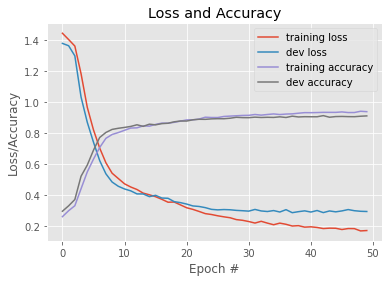

In [ ]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'elu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'elu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =50

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

This attempt used 2 elu's and one sigmoid. honestly its just a sligtly worse version of the 2 relu and one sigmoid. The model was slower to reach its peak, and the overfitting is higher making this a sub optimal change to the model. 

Epoch 1/50
219/219 [==============================] - 1s 2ms/step - loss: 1.0008 - accuracy: 0.5611 - val_loss: 0.5517 - val_accuracy: 0.7833
Epoch 2/50
219/219 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.8218 - val_loss: 0.3241 - val_accuracy: 0.8749
Epoch 3/50
219/219 [==============================] - 0s 2ms/step - loss: 0.2740 - accuracy: 0.8972 - val_loss: 0.2190 - val_accuracy: 0.9238
Epoch 4/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9350 - val_loss: 0.1938 - val_accuracy: 0.9332
Epoch 5/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1589 - accuracy: 0.9415 - val_loss: 0.1835 - val_accuracy: 0.9366
Epoch 6/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1327 - accuracy: 0.9529 - val_loss: 0.1966 - val_accuracy: 0.9358
Epoch 7/50
219/219 [==============================] - 0s 2ms/step - loss: 0.1021 - accuracy: 0.9669 - val_loss: 0.1921 - val_accuracy: 0.9388
Epoch 

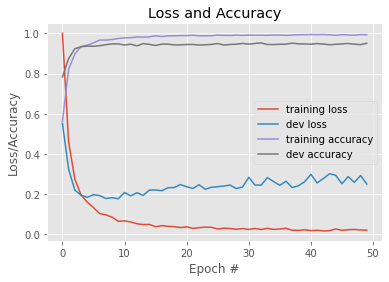

In [66]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'elu'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =50

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

This attempt used 2 relu and 1 elu. While this model did reach its peak extremely fast, the overfitting is so much worse. Also instead of a smooth accuracy curve, we have a very choppy one here. The over all accuracy is also the same as the relu,relu, sigmoid model.

 I believe I can say with confidance that relu,relu,sigmoid with dropout will and had given us the best model. Now I will run that model again and try the test data that has been hidden up until this point.

Epoch 1/6
219/219 [==============================] - 1s 3ms/step - loss: 1.1774 - accuracy: 0.4199 - val_loss: 0.7383 - val_accuracy: 0.7251
Epoch 2/6
219/219 [==============================] - 0s 2ms/step - loss: 0.5965 - accuracy: 0.7564 - val_loss: 0.3790 - val_accuracy: 0.8724
Epoch 3/6
219/219 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8756 - val_loss: 0.2612 - val_accuracy: 0.9045
Epoch 4/6
219/219 [==============================] - 0s 2ms/step - loss: 0.2245 - accuracy: 0.9202 - val_loss: 0.2060 - val_accuracy: 0.9323
Epoch 5/6
219/219 [==============================] - 0s 2ms/step - loss: 0.1811 - accuracy: 0.9345 - val_loss: 0.1751 - val_accuracy: 0.9370
Epoch 6/6
219/219 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9523 - val_loss: 0.1806 - val_accuracy: 0.9358
Test accuracy
73/73 [==============================] - 0s 733us/step
              precision    recall  f1-score   support

           0       0.99      0

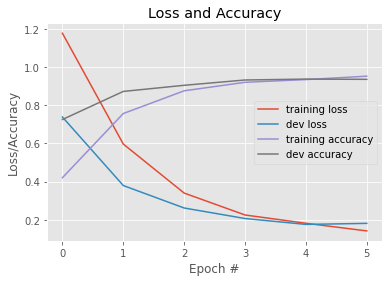

In [67]:
# define the 3072-256-128-10 architecture using Keras
from re import X
from tabnanny import verbose

x=0.2
model = Sequential()
model.add(Dense(256, input_shape = (64,), activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(x))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dropout(x))
model.add(Dense(4, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# fit the model to the training data
maxEpoch =6

H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32, verbose =1 )

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(valX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = valY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Test accuracy
73/73 [==============================] - 0s 835us/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       586
           1       0.93      0.97      0.95       581
           2       0.93      0.90      0.92       598
           3       0.91      0.91      0.91       570

    accuracy                           0.94      2335
   macro avg       0.94      0.94      0.94      2335
weighted avg       0.94      0.94      0.94      2335



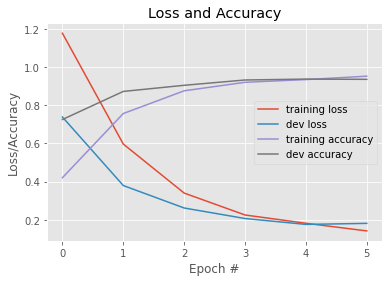

In [68]:

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)
pre = predictedY
# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'dev loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'dev accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

[1 2 3 ... 0 1 1]
[1 2 3 ... 0 3 1]


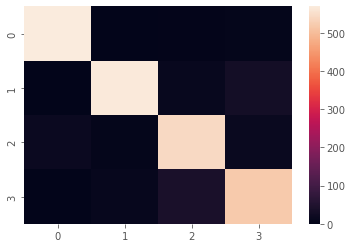

In [69]:
import seaborn as sb
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(predictedY, realY)
temp = [predictedY, realY]
heat_map = sb.heatmap(cf_matrix)
print(predictedY)
print(realY)

plt.show()


As can be clearly seen by this model. The test data preformed just as well as the validation data did. This is a massive success for the model, and the confusion matrix shows that while some mistakes were made, predominatly all classes sucessfully managed to predict what the input data was.

#   End of project

##  Review of what was done

### step 1 Load and setup data
1. We loaded the 4 sperate classes from kraggle
2. Set the labels of the data so that the columns will line up
3. Combine the dataframes
4. Split into test, val, and training sets
5. run the network on orginal data to see what happens
6. normalize the data

### step 2 Deciding on a activation function
1. try relu
2. try sigmoid
3. try tanh
4. look at which activation function had the least overfitting and work on that function


### step 3 determine network size
1. play with different layers while keeping in mind the number of inputs
2. pick the best format of those layers and keep it for the remainder of the project.


### step 4 attack the overfitting
1. Look into different methods of reducing overfitting
2. Realize that l1 and l2 are both bad for my data
3. move on to dropout

### step 5 Model is decent so now lets boost accuracy
1. try 2 sigmoids and 1 relu
2. try e relus and one sigmoid
3 pick option 2 to continue
4. increase dropout to elinate the overfitting
5. try adding one more layer of relu to boost accuracy


## Conclusions
This project was about being able to accuratly predict what muscle combination lead to what hand position. Utimalty this was achieved with 94 percent accuracy over all. now some hand postiosn are easier for the model to recognize than others. Lets take another look at the end reults of project


!["final"](output.png)




Looking at this we can see that we had accuracies of 98 for Rock, 95 for scissors, 92 for paper, and 91 for okay. All of these are very high values, but what I find interesting is that the ones with more mucsle tension have a higher prediction value. The way I justify this is that the posiotns of rock and scissors while both having more tension than okay and paper, when you make these movements and watch your arm, the difference between rock and scissors is night and day. But when doing the same with okay and paper, both of which are more relaxed positions. there is not as much of a difference in the motion of the muscles. If this interction is behaving as I think it is, the model has 2 different conflicts with its self, a small fight between 0 and 1, and a larger struggle between 2, and 3. Even with this issue the data has enough information that utimatly there is no real need for concern on the accuracy as over all it works really well. Not to mention it is insanly fast to run. The next step if there was more time would to be try and find the best initial condtions for the weights, and maybe see if a different learning rate on the adam fucntion would have a signigant. It is my hypothis that even if there was a boost, it would be a minor change, as the data is only so spefic. 